# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

This task can be reframed as a supervised regression problem where the target variable is the used car price and the predictor variables include features such as age, mileage, condition, make, and model. The objective is to perform feature selection and engineering, followed by exploratory data analysis and statistical testing, to determine the key explanatory variables that drive price variance. Ultimately, the goal is to build an interpretable predictive model using techniques like linear regression that quantify the impact of each feature on pricing.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Load and Inspect the Data

Generate Summary Statistics

Visualize Data Distributions

Assess Missing Data

Check for Duplicates and Inconsistencies

Validate Data Ranges and Domain Constraints

Explore Relationships Among Variables

Document Initial Findings

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [1]:
# Import various libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy import stats
from category_encoders import TargetEncoder
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel

In [41]:
# Create dataframe from CSV data
cars_df = pd.read_csv('data/vehicles.csv')

In [3]:
#Basic info about dataset
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
cars_df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [5]:
cars_df['paint_color'].value_counts()

paint_color
white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: count, dtype: int64

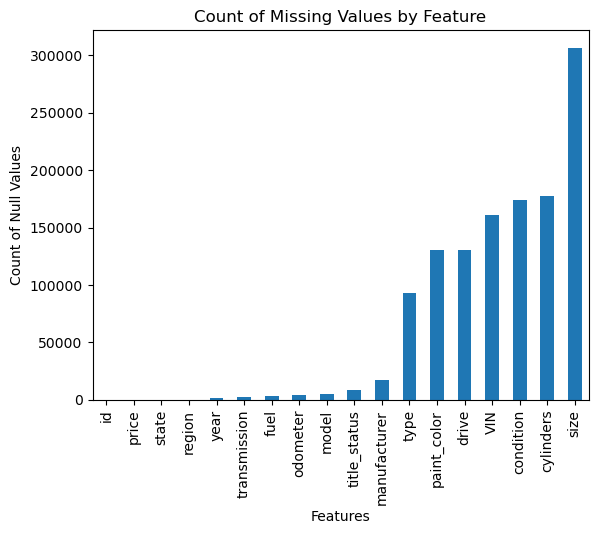

In [6]:
# Where are our Nans?
cars_df.isnull().sum().sort_values().plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Count of Null Values')
plt.title('Count of Missing Values by Feature')
plt.show();

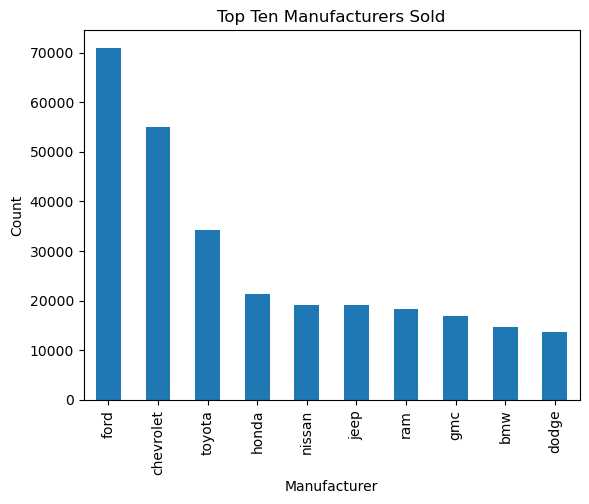

In [7]:
# Top ten manufacturers sold
brand_counts = cars_df['manufacturer'].value_counts().head(10)
brand_counts.plot(kind='bar')
plt.title('Top Ten Manufacturers Sold')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.show;


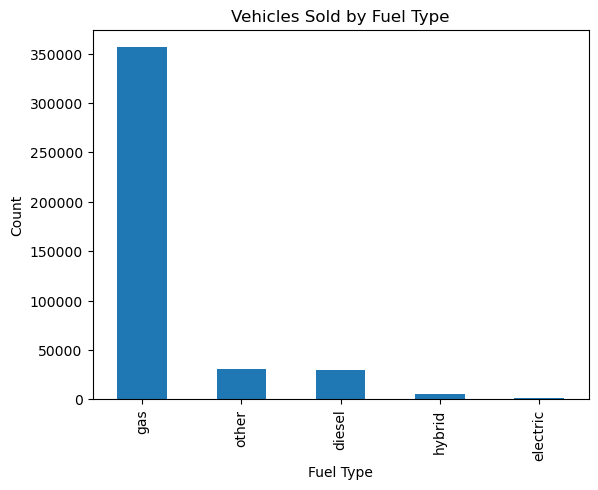

In [8]:
# Get a sense of the distribution of fuel types
fuel_counts = cars_df['fuel'].value_counts()
fuel_counts.plot(kind= 'bar')
plt.title('Vehicles Sold by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show;

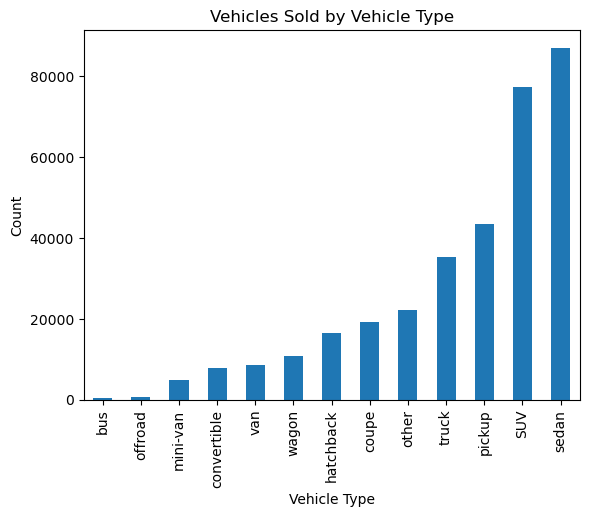

In [9]:
# Vehicles sold by type
type_count = cars_df['type'].value_counts().sort_values()
type_count.plot(kind= 'bar')
plt.title('Vehicles Sold by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show;

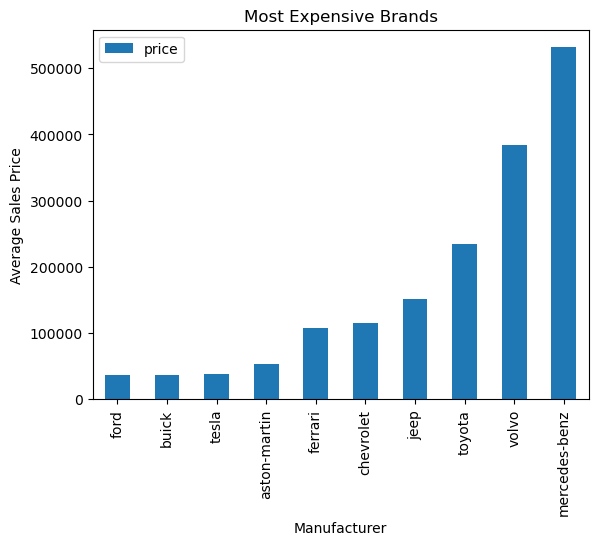

In [10]:
# Most expensive brands
exp_cars = cars_df.groupby('manufacturer')[['price']].mean().sort_values(by='price').tail(10)
exp_cars.plot(kind= 'bar')
plt.title('Most Expensive Brands')
plt.xlabel('Manufacturer')
plt.ylabel('Average Sales Price');


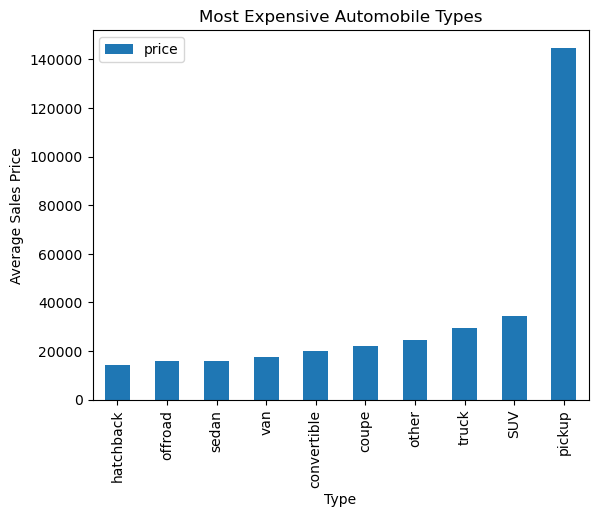

In [11]:
# Most expensive types
exp_cars = cars_df.groupby('type')[['price']].mean().sort_values(by='price').tail(10)
exp_cars.plot(kind= 'bar')
plt.title('Most Expensive Automobile Types')
plt.xlabel('Type')
plt.ylabel('Average Sales Price');

In [12]:
# Imputation using the mode for categorical data
cars_df['size'] = cars_df['size'].fillna(cars_df['size'].mode()[0])
cars_df['cylinders'] = cars_df['cylinders'].fillna(cars_df['cylinders'].mode()[0])
cars_df['fuel'] = cars_df['fuel'].fillna(cars_df['fuel'].mode()[0])
cars_df['transmission'] = cars_df['transmission'].fillna(cars_df['transmission'].mode()[0])
cars_df['paint_color'] = cars_df['paint_color'].fillna(cars_df['paint_color'].mode()[0])
cars_df['type'] = cars_df['type'].fillna(cars_df['type'].mode()[0])
cars_df['title_status'] = cars_df['title_status'].fillna(cars_df['title_status'].mode()[0])

# Fill missing values for specific categorical columns with 'Unknown'
cars_df['manufacturer'] = cars_df['manufacturer'].fillna('Unknown')
cars_df['model'] = cars_df['model'].fillna('Unknown')
cars_df['condition'] = cars_df['condition'].fillna('Unknown')
cars_df['drive'] = cars_df['drive'].fillna('Unknown')

# Median imputation for numeric values
cars_df['year'] = cars_df['year'].fillna(cars_df['year'].median())
cars_df['odometer'] = cars_df['odometer'].fillna(cars_df['odometer'].median())

# Drop columns with no valuable information
cars_df.drop(columns=['region', 'VIN', 'id', 'state', 'size', 'model', 'drive', 'cylinders', 'title_status', 'transmission'], inplace=True)

In [13]:
# Make sure numbers are integers
cars_df['year'] = cars_df['year'].fillna(cars_df['year'].median())
cars_df['odometer'] = cars_df['odometer'].fillna(cars_df['odometer'].median())

In [14]:
#Convert 'condition' to ordinal numeric
conditions_dict = {
    'Unknown': 0,
    'salvage': 1,
    'fair': 2, 
    'good': 3, 
    'excellent': 4,
    'like new': 5, 
    'new': 6 
}

cars_df['condition'] = cars_df['condition'].map(conditions_dict)

In [15]:
# Engineer a car age feature
cars_df['posting_year'] = int(cars_df['year'].max())
cars_df['car_age'] = cars_df['posting_year'] - cars_df['year']
cars_df.drop(columns=['posting_year', 'year'], inplace= True)

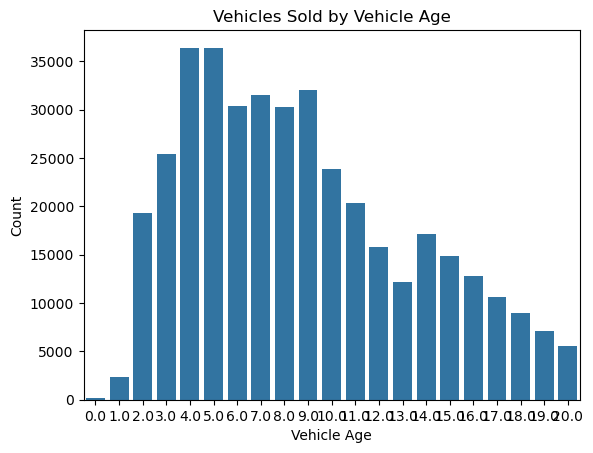

In [16]:
# Vehicles sold by car_age where car_age < 20 years
age_count = cars_df['car_age'].value_counts().sort_values().reset_index()
age_count = age_count[age_count['car_age'] <= 20]
sns.barplot(data= age_count, x= 'car_age', y= 'count')
plt.title('Vehicles Sold by Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.show;

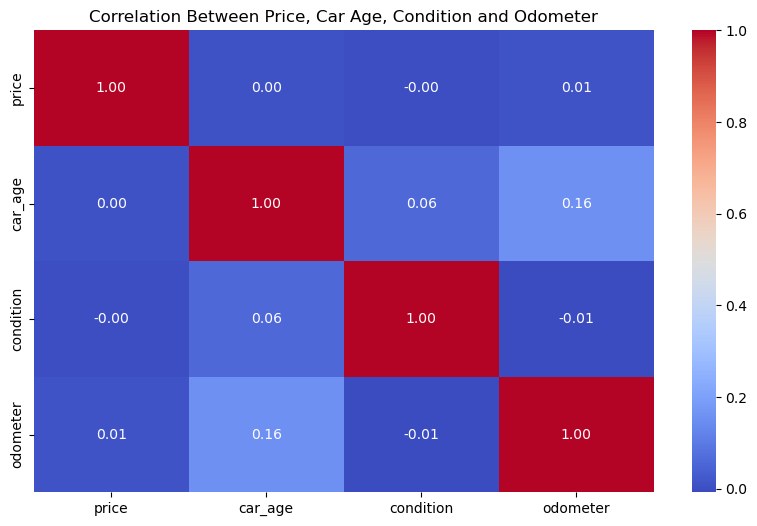

In [17]:
# Correlation of numeric categories
plt.figure(figsize=(10,6))
sns.heatmap(cars_df[['price', 'car_age', 'condition', 'odometer']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Price, Car Age, Condition and Odometer")
plt.show()

In [18]:
# Drop any duplicates
cars_df = cars_df.drop_duplicates()

In [19]:
# Constrain dataset for price within IQR
Q1 = cars_df['price'].quantile(0.25)
Q3 = cars_df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep rows where value is within the IQR
cars_df = cars_df[(cars_df['price'] >= lower_bound) & (cars_df['price'] <= upper_bound)]

# Constrain dataset for odometer within IQR
Q1 = cars_df['odometer'].quantile(0.25)
Q3 = cars_df['odometer'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep rows where value is within the IQR
cars_df = cars_df[(cars_df['odometer'] >= lower_bound) & (cars_df['odometer'] <= upper_bound)]

In [20]:
# Let's drop transactions bloew $2K as they will skew any models we create
cars_df = cars_df[cars_df['price'] >= 2000]

# Further, there are a handful of very old cars skewing results, let's retain cars that are 30 years old or less
cars_df = cars_df[cars_df['car_age'] <= 30]


In [21]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190096 entries, 0 to 426873
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         190096 non-null  int64  
 1   manufacturer  190096 non-null  object 
 2   condition     190096 non-null  int64  
 3   fuel          190096 non-null  object 
 4   odometer      190096 non-null  float64
 5   type          190096 non-null  object 
 6   paint_color   190096 non-null  object 
 7   car_age       190096 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 13.1+ MB


In [22]:
cars_df.describe()

,price,condition,odometer,car_age
count,190096.000000,190096.000000,190096.000000,190096.000000
mean,14222.105973,2.314957,107249.489084,11.065651
std,9664.831319,1.870812,59106.334308,5.713385
min,2000.000000,0.000000,0.000000,0.000000
25%,6500.000000,0.000000,62464.750000,7.000000
50%,11500.000000,3.000000,105000.000000,10.000000
75%,19924.750000,4.000000,148000.000000,15.000000
max,42400.000000,6.000000,281156.000000,30.000000


Initial Findings

There is almost no direct correlation between any original numeric features and price. The highest correlation between numeric features is price and odometer.

Ford is the most popular brand while Tesla is the most expensive. The largest percentage of vehicles sold are the sedan type while pickup trucks have the highest average selling price.



### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [23]:
X= cars_df.drop(columns=['price'])
y= cars_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [24]:
car_feats = cars_df.select_dtypes('object').columns
car_nums = cars_df.select_dtypes('number').columns

In [25]:
#Set a baseline of price prediction using the price column mean
baseline_train = np.ones(shape = y_train.shape) * y_train.mean()
baseline_test = np.ones(shape = y_test.shape) * y_test.mean()
mse_baseline_train = mean_squared_error(baseline_train, y_train)
mse_baseline_test = mean_squared_error(baseline_test,y_test)

print(baseline_train.shape, baseline_test.shape)
print(f'Baseline for training data: {mse_baseline_train}')
print(f'Baseline for testing data: {mse_baseline_test}')

(133067,) (57029,)
Baseline for training data: 93532380.68583612
Baseline for testing data: 93117704.59297936


Better than our baseline.

In [26]:
#Which numeric feature has the highest correlation to price?
highest_corr = cars_df.select_dtypes(include='number').corr()[['price']].nlargest(columns = 'price', n = 2).index[1]
print(highest_corr)

condition


In [27]:
#Simple Linear Regression using highest correlated feature
X1 = X_train[['condition']]
lr = LinearRegression().fit(X1, y_train)
train_mse = mean_squared_error(y_train, lr.predict(X1))
test_mse = mean_squared_error(y_test, lr.predict(X_test[['condition']]))

print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')

Train MSE:  92562277.61
Test MSE:  92000757.05


Modeling only on year is better than baseline.

In [28]:
# Use target encoder for non-numeric categories
target_encoder = TargetEncoder()
X_train_enc = target_encoder.fit_transform(X_train[car_feats], y_train)
X_train_enc = X_train_enc.join(cars_df[car_nums])
X_train_enc.drop(columns=['price'], inplace= True)
X_test_enc = target_encoder.transform(X_test[car_feats])
X_test_enc = X_test_enc.join(cars_df[car_nums])
X_test_enc.drop(columns=['price'], inplace= True)

In [29]:
# Model using numeric and non-numeric features
pipe= Pipeline([
    ('poly', PolynomialFeatures(include_bias= False)),
    ('scaler', StandardScaler()),
    ('linreg', LinearRegression()),
])

pipe.fit(X_train_enc, y_train)
training_preds= pipe.predict(X_train_enc)
train_mse= mean_squared_error(y_train, training_preds)
testing_preds= pipe.predict(X_test_enc)
test_mse = mean_squared_error(testing_preds, y_test)

print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')


Train MSE:  32862309.46
Test MSE:  32529385.27


A significant improvement in model performance using all categories, normalization and polynomial features.

In [30]:
# Model using categories and numeric values with Ridge
pipe= Pipeline([
    ('poly', PolynomialFeatures(include_bias= False)),
    ('scaler', StandardScaler()),
    ('rdige', Ridge()),
])


pipe.fit(X_train_enc, y_train)
training_preds= pipe.predict(X_train_enc)
train_mse= mean_squared_error(y_train, training_preds)
testing_preds= pipe.predict(X_test_enc)
test_mse = mean_squared_error(testing_preds, y_test)

print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')

Train MSE:  32862311.36
Test MSE:  32529394.93


No improvement using Ridge regression

In [31]:
# Model using categories and numeric values with Lasso
pipe= Pipeline([
    ('poly', PolynomialFeatures(include_bias= False)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso()),
])

pipe.fit(X_train_enc, y_train)
training_preds= pipe.predict(X_train_enc)
train_mse= mean_squared_error(y_train, training_preds)
testing_preds= pipe.predict(X_test_enc)
test_mse = mean_squared_error(testing_preds, y_test)

print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')

Train MSE:  32866954.76
Test MSE:  32531512.84


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.914e+10, tolerance: 1.245e+09
  model = cd_fast.enet_coordinate_descent(


No significant difference in using Linear, Ridge or Lasso regression.

In [32]:
pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 3, include_bias = False)),
                ('scaler', StandardScaler()),
                ('selector', SelectFromModel(Lasso())),
                ('linreg', LinearRegression())])

pipe.fit(X_train_enc, y_train)
training_preds= pipe.predict(X_train_enc)
train_mse= mean_squared_error(y_train, training_preds)
testing_preds= pipe.predict(X_test_enc)
test_mse = mean_squared_error(testing_preds, y_test)

print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.518e+12, tolerance: 1.245e+09
  model = cd_fast.enet_coordinate_descent(


Train MSE:  31209903.83
Test MSE:  31020397.62


Using Lasso feature selection results in better scores.

In [33]:
pipe = Pipeline([
    # ('poly_features', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select=4)),
    ('ridge', Ridge())
])

pipe.fit(X_train_enc, y_train)
training_preds= pipe.predict(X_train_enc)
train_mse= mean_squared_error(y_train, training_preds)
testing_preds= pipe.predict(X_test_enc)
test_mse = mean_squared_error(testing_preds, y_test)

print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')

Train MSE:  40503437.72
Test MSE:  40153019.90


In [34]:
pipe['selector'].get_feature_names_out()

array(['x0', 'x2', 'x5', 'x6'], dtype=object)

In [40]:
X_train_enc.describe()

,manufacturer,fuel,type,paint_color,condition,odometer,car_age
count,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000
mean,14207.578408,14207.531567,14207.531567,14207.531567,2.315555,107416.701466,11.080148
std,2854.025955,2004.232695,2990.858018,1078.981006,1.870011,59060.539950,5.714334
min,4836.056306,12404.160782,9591.027905,10242.932406,0.000000,0.000000,0.000000
25%,11771.073883,13641.395720,12038.754267,13295.942411,0.000000,62750.500000,7.000000
50%,14496.292898,13641.395720,12038.754267,14650.070467,3.000000,105105.000000,10.000000
75%,15402.687082,13641.395720,15046.041258,14650.070467,4.000000,148073.000000,15.000000
max,36029.036130,21328.579006,20863.549547,15747.166245,6.000000,281156.000000,30.000000


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

While I was able to develop several models that performed better than baseline, none that I came up with allowed me to make specific, reliable price predictions. I'm unsure as to whether this is due to my cleaning and prep, the transformations and normalizations or incorrect model selection.

I would have thought that the numeric categories would have provided a decent model but it was only after transforming categorical columns for inclusion that I began to see MSE improvements. Particularly frustrating was the fact that I had a good model working very early on in process with an MSE of less than 1 for both train and test but I lost it with iteration, and have been unable to reproduce. I will go back and iterate on which columns I select for inclusion and see if it helps, time permitting.

That said, there are some common sense measures that I've been able to derive from the dataset that will allow for some high-level inferences that address the business objective of advising used car dealers as to what inventory they should stock, enumerated below.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Top Five Best Selling Vehicle Brands

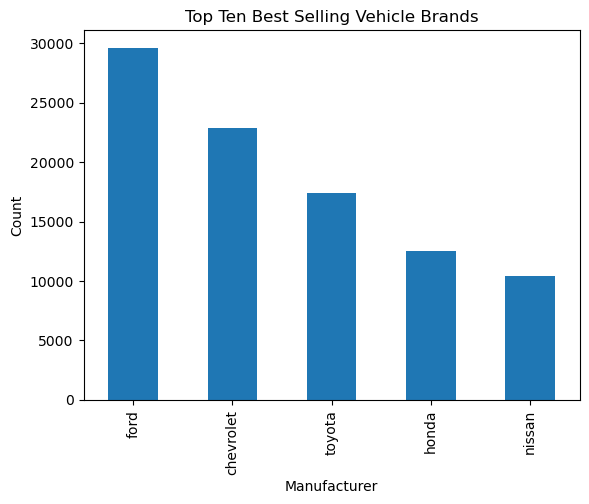

In [36]:
brand_counts = cars_df['manufacturer'].value_counts().head(5)
brand_counts.plot(kind='bar')
plt.title('Top Ten Best Selling Vehicle Brands')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.show;

Top Five Best Selling Vehicle Types

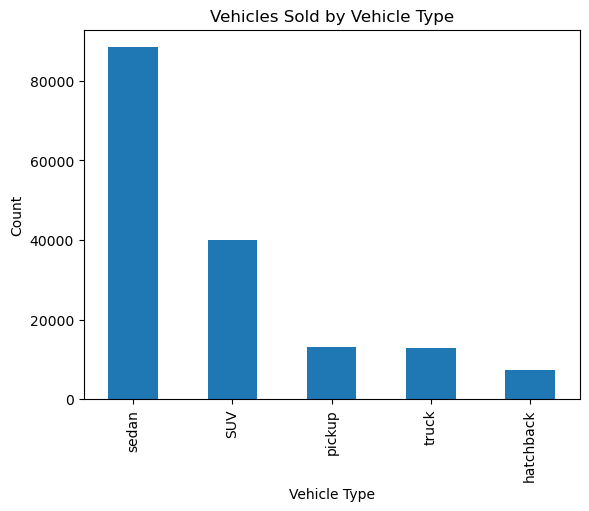

In [37]:
type_count = cars_df['type'].value_counts().sort_values(ascending= False).head(5)
type_count.plot(kind= 'bar')
plt.title('Vehicles Sold by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show;

Most Popular Fuel Types

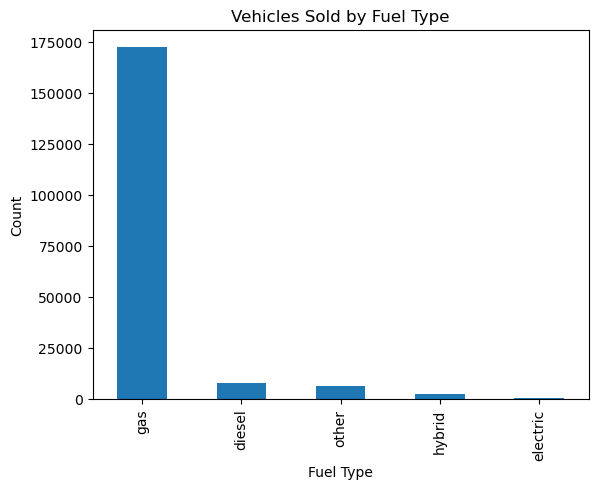

In [38]:
fuel_counts = cars_df['fuel'].value_counts()
fuel_counts.plot(kind= 'bar')
plt.title('Vehicles Sold by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show;

Vehicles Sold By Vehicle Age

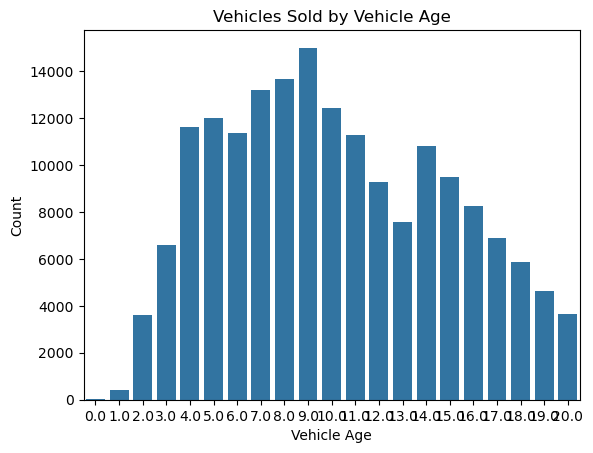

In [39]:
age_count = cars_df['car_age'].value_counts().sort_values().reset_index()
age_count = age_count[age_count['car_age'] <= 20]
sns.barplot(data= age_count, x= 'car_age', y= 'count')
plt.title('Vehicles Sold by Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.show;

Focus on gas-powered Ford Sedans between four and nine years old.